# Plotting with Plotly

Requirements:
* plotly
* pandas
* sklearn
* ipywidgets

In [1]:
# Erstellen von Testdaten
import numpy as np
import pandas as pd

style = 'seaborn-whitegrid'

np.random.seed(42)
df = pd.DataFrame({'x_1': range(10), 
                   'x_2': np.array(range(10)) * 2,
                   'y_1': np.random.randint(0, 10, 10),
                   'y_2': np.random.randint(0, 10, 10)})


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0, n_classes=4, n_informative=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.datasets import load_iris

iris_dict = load_iris()
iris = pd.DataFrame()
iris['y'] = iris_dict['target']
iris['sepal length (cm)'] = iris_dict.data[:, 0]
iris['sepal width (cm)'] = iris_dict.data[:, 1]
iris['petal length (cm)'] = iris_dict.data[:, 2]
iris['petal width (cm)'] = iris_dict.data[:, 3]

# Verlaufsplots

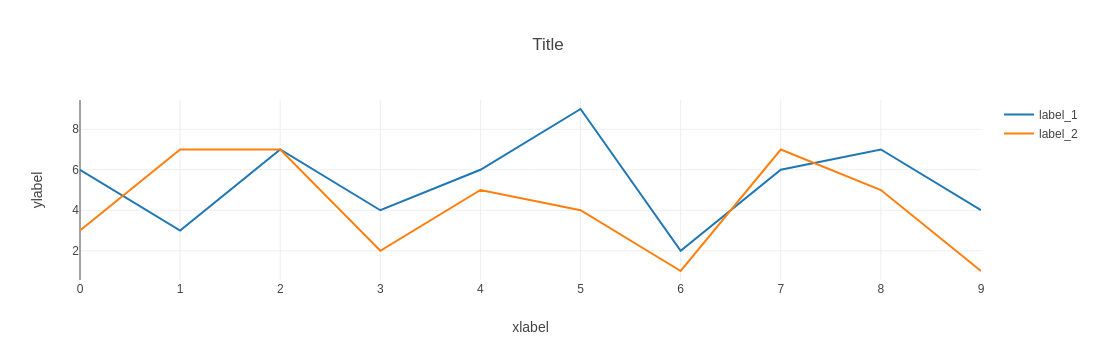

In [3]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x_1'], y=df['y_1'], mode='lines', name='label_1'))
fig.add_trace(go.Scatter(x=df['x_1'], y=df['y_2'], mode='lines', name='label_2'))

fig.update_layout(title='Title', xaxis_title='xlabel', yaxis_title='ylabel', template='none')

fig.show()
fig.write_image('plotly_plots/verlauf.pdf')

# Konfusionsmatrix

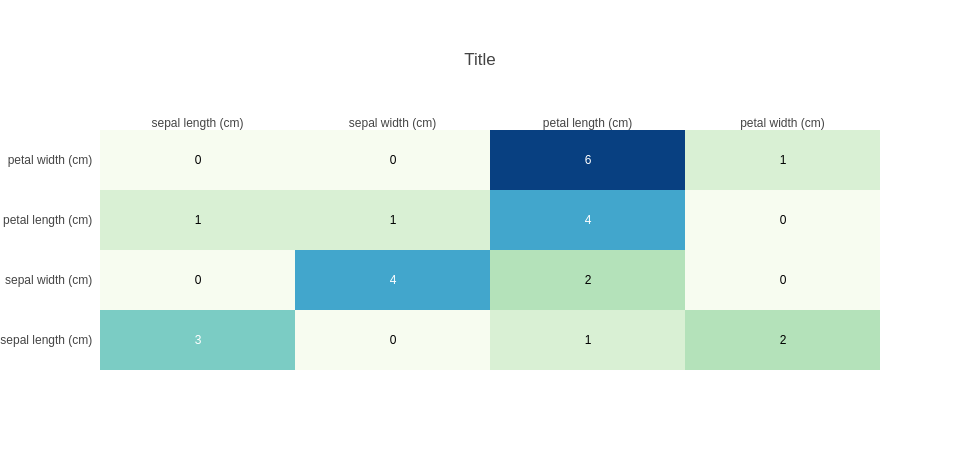

In [4]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
x = iris_dict.feature_names
cm_text = [[str(y) for y in a] for a in cm]


fig = ff.create_annotated_heatmap(cm, x=x, y=x, annotation_text=cm_text, colorscale='gnbu')
fig.update_layout(title='Title', template='none', width=450, height=450, margin={'l': 100, 't': 130})

fig.show()
fig.write_image('plotly_plots/konfusionsmatrix.pdf')

# Parallel-Koordinaten Plot

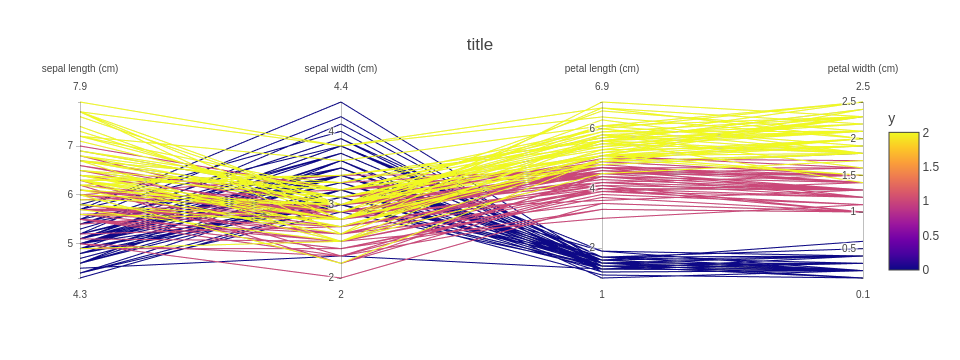

In [5]:
import plotly.express as px

fig = px.parallel_coordinates(iris, color='y', dimensions=iris_dict.feature_names)#, color_continuous_scale='gnbu')

fig.update_layout(title='title', margin={'t': 100}, template='none')
fig.show()
fig.write_image('plotly_plots/parallel_koordinaten.pdf')

# Scatterplot

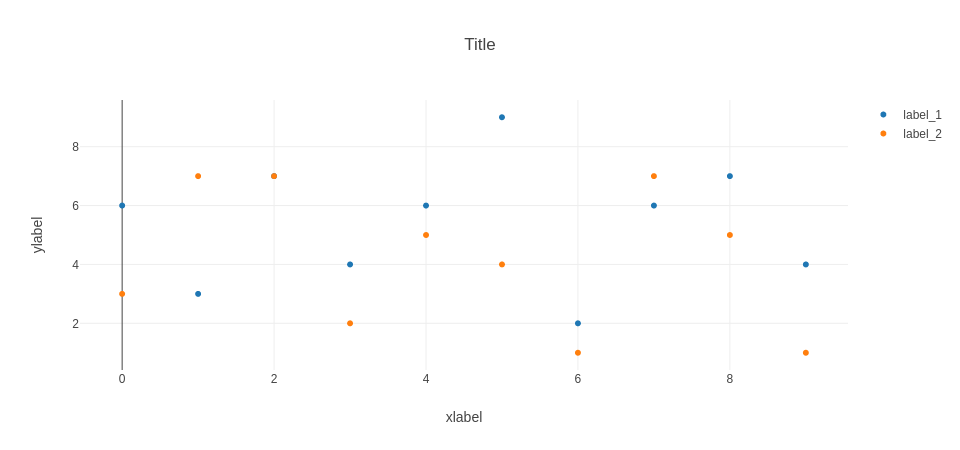

In [6]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['x_1'], y=df['y_1'], mode='markers', name='label_1'))
fig.add_trace(go.Scatter(x=df['x_1'], y=df['y_2'], mode='markers', name='label_2'))

fig.update_layout(title='Title', xaxis_title='xlabel', yaxis_title='ylabel', template='none', width=450, height=450)

fig.show()
fig.write_image('plotly_plots/scatter.pdf')

# Scatterplot matrix

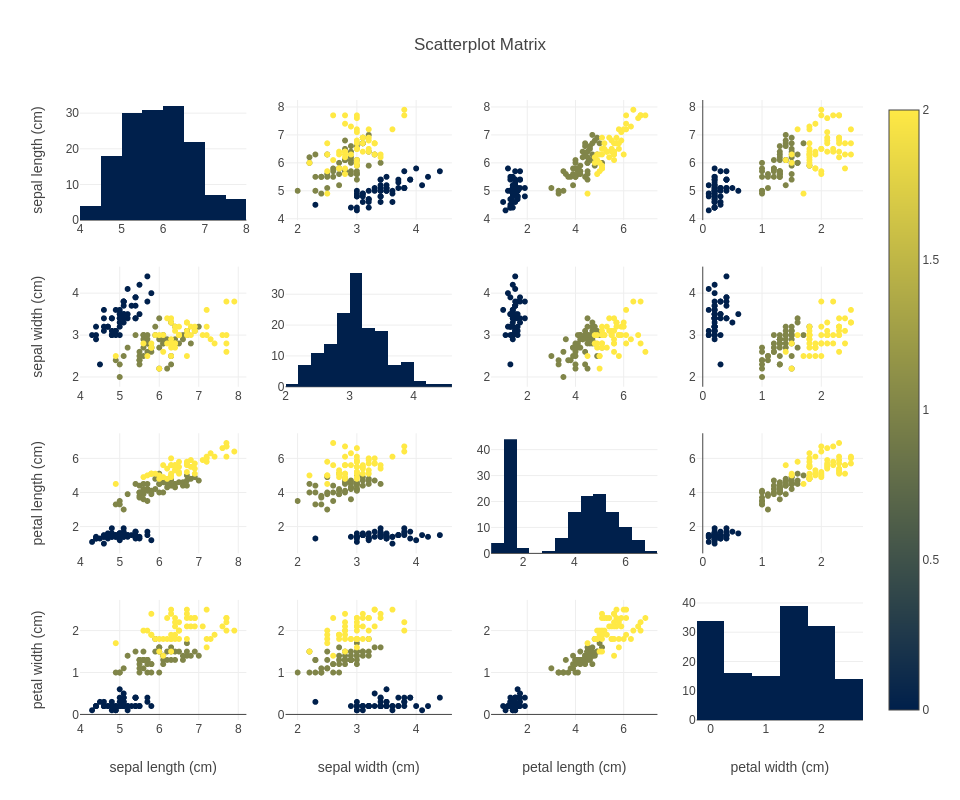

In [7]:
import plotly.express as px
import plotly.figure_factory as ff


# fig = px.scatter_matrix(iris, dimensions=iris_dict.feature_names, color='y')
fig = ff.create_scatterplotmatrix(iris, diag='histogram', index='y', height=800, width=800, colormap='Cividis')

fig.update_layout(template='none')
fig.show()
fig.write_image('plotly_plots/scatterplot_matrix.pdf')

# Balkendiagramme

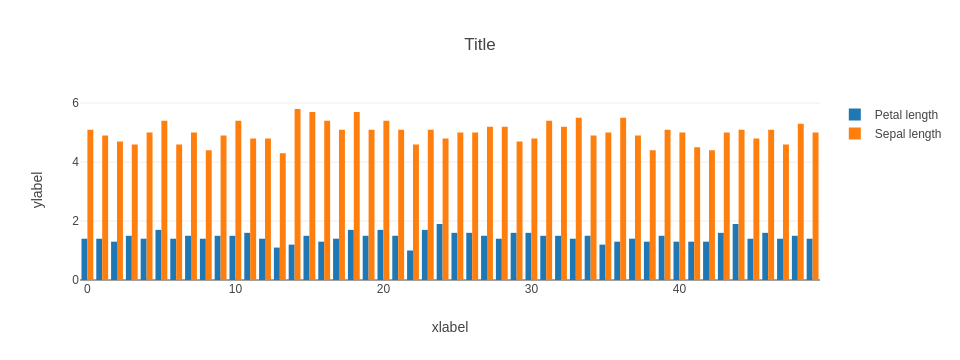

In [8]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Petal length', x=np.arange(50), y=iris['petal length (cm)'].iloc[:50]),
    go.Bar(name='Sepal length', x=np.arange(50), y=iris['sepal length (cm)'].iloc[:50])
])

fig.update_layout(template='none', title='Title', xaxis_title='xlabel', yaxis_title='ylabel')
fig.show()
fig.write_image('plotly_plots/balken.pdf')

# Histogramme

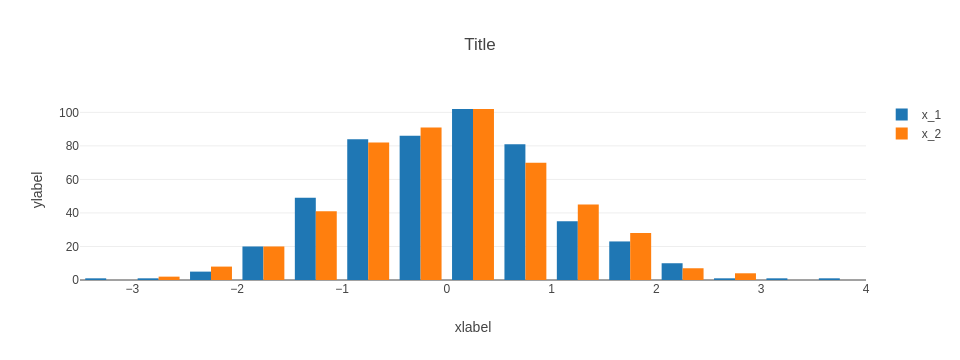

In [9]:
import plotly.graph_objects as go


import numpy as np
np.random.seed(42)

x_1 = np.random.randn(500)
x_2 = np.random.randn(500)


fig = go.Figure(data=[
    go.Histogram(name='x_1', x=x_1, nbinsx=15),
    go.Histogram(name='x_2', x=x_2)
])

fig.update_layout(template='none', title='Title', xaxis_title='xlabel', yaxis_title='ylabel')
fig.show()
fig.write_image('plotly_plots/hist.pdf')

# 3D-Plot

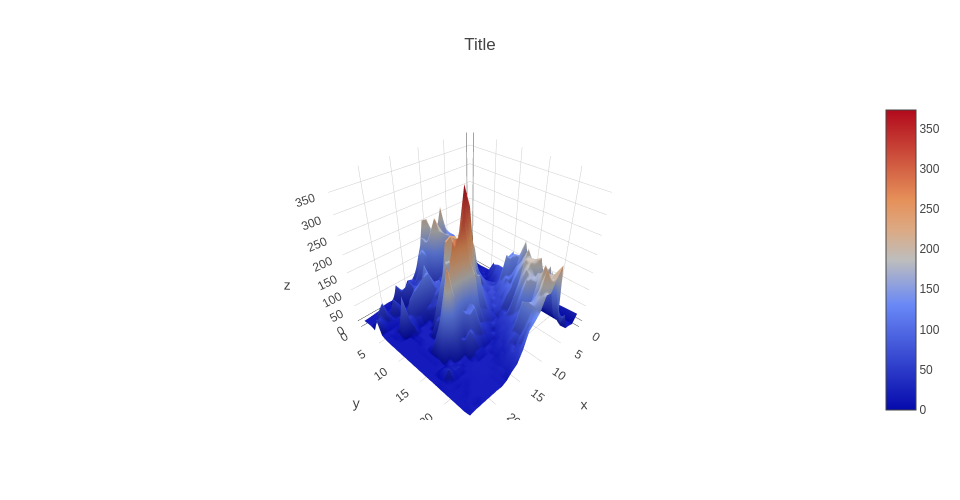

In [10]:
import plotly.graph_objects as go
import pandas as pd

z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(
    data=go.Surface(z=z_data.values),
)

fig.update_layout(title='Title', width=500, height=500, template='none')

fig.show()
fig.write_image('plotly_plots/3d.pdf')